# Ques 1.1 JPEG Compression Using Quantization Matrix

In [1]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from scipy import fft
import cv2
from sklearn.metrics import mean_squared_error

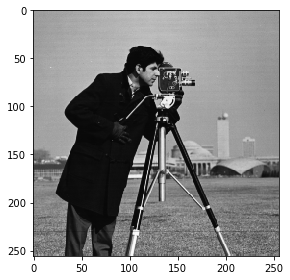

In [2]:
image = io.imread("cameraman.tif")
io.imshow(image)

In [17]:
#Function to calculate Quantization Matrix
def calcQ(a,b,c):
    Q = np.array([[c ,a, b ,b, b, b, b, b],[a ,a, b, b ,b ,b ,b, b],[b ,b, b, b, b, b, b ,b,],[b ,b ,b ,b ,b ,b ,b ,b],
                  [b ,b ,b, b, b, b, b, b],[b ,b, b ,b ,b ,b ,b ,b],[b ,b, b, b, b, b, b, b],[b ,b ,b ,b ,b,b ,b ,b]])
    return Q

In [4]:

#Function to compress/Decompress using Quantization Matrix. Mode selected using compressFlag variable
def imageCompressOrDecompress(image,a,b,c,compressFlag):
 Q=calcQ(a,b,c)
 if(compressFlag==1):
     
     result = np.zeros(image.shape)
     r,c = image.shape
     for i in range(0,r,8):
        for j in range(0,c,8):
            block = image[i:i+8,j:j+8]

            dct_block = cv2.dct(block.astype('float')/255)

            dct_block = dct_block*255
            yij = (dct_block/Q) + 0.5
            yij = np.floor(yij)
            #yij = np.int64(yij)
        
            result[i:i+8,j:j+8] = yij
     return result

 else:
        
        result = np.zeros(image.shape)
        r,c = image.shape
        for i in range(0,r,8):
            for j in range(0,c,8):
                block = image[i:i+8,j:j+8]
                dct_block = block*Q
                dct_block = cv2.idct(dct_block)
                #result[i:i+8,j:j+8] = (dct_block.clip(0,255)).astype('uint8')
                result[i:i+8,j:j+8] = dct_block
        result = (result.clip(0,255)).astype('uint8')

        return result
    
    
    


In [20]:
# Function to report file size in bits
def fileSizeInBits(image):
    r,c = image.shape
    total_bits =0
    for m in range(r):
       for n in range(c):
          if(image[m,n]==0):
           total_bits += 1
          else:
            bits = np.ceil(np.log2(abs(image[m,n]) +1))
            total_bits += bits*2 
    return total_bits


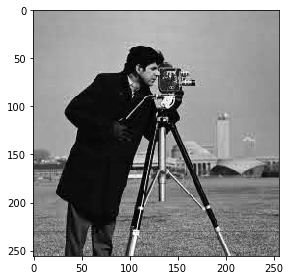

In [33]:
# Function to show image using Compression followed by decompression using Quantization matrix
def show1(a,b,c):
    comp =   imageCompressOrDecompress(image,a,b,c,1)
    decomp = imageCompressOrDecompress(comp,a,b,c,0)
    io.imshow(decomp,cmap='gray')
    plt.show()
    return comp,decomp
comp1a,decomp1a=show1(10,40,20)
    

In [37]:
mseQue1a = mean_squared_error(decomp1a, image)
print("Mean Squared Error between Original and Decompressed Image  ", mseQue1a)
f_size_1a = fileSizeInBits(comp1a)
print("File Size of compressed Image in bits is ", f_size_1a )
compression_ratio = fileSizeInBits(image)/ fileSizeInBits(comp)
print("Compression Ratio is ", compression_ratio)



Mean Squared Error between Original and Decompressed Image   27.858917236328125
File Size of compressed Image in bits is  92169.0
Compression Ratio is  9.936030552571905


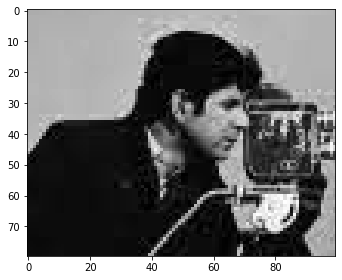

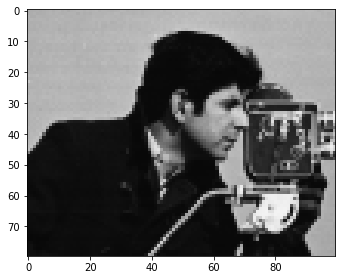

In [26]:
io.imshow(decomp[30:110,60:160],cmap='gray')
plt.show()
io.imshow(image[30:110,60:160],cmap='gray')
plt.show()

# Ques 1.2 JPEG Compression Without Quantization Matrix

In [27]:
#Function to compress/ Decompress without DCT coefficients' quantization. Mode selected using CompressFlag
def imageCompressOrDecompressB(image,compressFlag):
 if(compressFlag==1):
    
     result = np.zeros(image.shape)
     r,c = image.shape
     for i in range(0,r,8):
        for j in range(0,c,8):
            block = image[i:i+8,j:j+8]
            dct_block = cv2.dct(block.astype('float')/255)
            dct_block = dct_block*255
            #dct_block = fft.dct(block)
            yij = np.round(dct_block )        
            result[i:i+8,j:j+8] = yij
     return result
    
     

 else:
    
    result2 = np.zeros(comprs.shape)
    r,c = comprs.shape
    for i in range(0,r,8):
        for j in range(0,c,8):
            block = comprs[i:i+8,j:j+8]
        
            dct_block = cv2.idct(block)
            result2[i:i+8,j:j+8] = dct_block
        result2 = (result2.clip(0,255)).astype('uint8')
    return result2
        
        
        
    


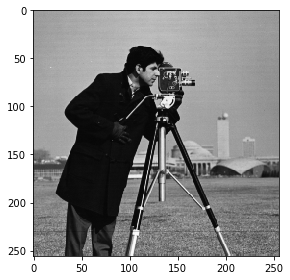

In [34]:
# Function to show image using Compression followed by decompression without using Quantization matrix
def show2():
    comp =   imageCompressOrDecompressB(image,1)
    decomp = imageCompressOrDecompressB(comp,0)
    io.imshow(decomp,cmap='gray')
    plt.show()
    return comp,decomp
comp1b,decomp1b=show2()

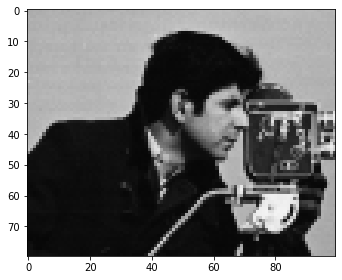

In [43]:
io.imshow(decomp1b[30:110,60:160],cmap='gray')
plt.show()

In [39]:
mseQue1b = mean_squared_error(decomp1b, image)
print("Mean Squared Error between Original and Decompressed Image  ", mseQue1b)
f_size_1b = fileSizeInBits(comp1b)
print("File Size of compressed Image in bits is ", f_size_1b )
compression_ratio = fileSizeInBits(image)/ fileSizeInBits(comp1b)
print("Compression Ratio is ", compression_ratio)


Mean Squared Error between Original and Decompressed Image   0.4942626953125
File Size of compressed Image in bits is  330474.0
Compression Ratio is  2.771152950005144


# Ques 1.3  Finding Optimal parameters

In [42]:
#Function to give optimal a,b,c for finding minimum MSE subject to File size smaller than Que1a Condition
def findOptimalValues(a,b,c,mseQue1a):
    opt_a = a
    opt_b = b
    opt_c = c
    mseMin=mseQue1a
    for a in range(10,101,10):
        for b in range(10,101,10):
            for c in range(10,101,10):
                comp   =   imageCompressOrDecompress(image,a,b,c,1)
                decomp =   imageCompressOrDecompress(comp,a,b,c,0)
                mse_new =  mean_squared_error(decomp,image)
                f_size   = fileSizeInBits(comp)
                
                if (mse_new < mseMin and f_size <= f_size_1a ):
                    mseMin = mse_new
                    opt_a = a
                    opt_b = b
                    opt_c = c   


    print("Optimal a is ",opt_a,"Optimal b is ",opt_b,"Optimal c is ",opt_c," MSE_MIN is ",mseMin," with File Size being equal to ",f_size)
    
findOptimalValues(a,b,c,mseQue1a)

Optimal a is  30 Optimal b is  30 Optimal c is  30  MSE_MIN is  24.6029052734375  with File Size being equal to  74708.0
